# W18: 以政府公開資料做趨勢圖應用

----
## 應用練習: 高雄市空氣品質監測數據

- https://data.gov.tw/dataset/104783

- 資料資源欄位: 
    - Name(測站名稱)、Date(監測日期)、TSP(總懸浮微粒μg/m3)、PM10(懸浮微粒μg/m3)、Chloride(氯鹽μg/m3)、Nitrate(硝酸鹽μg/m3)、Sulfate(硫酸鹽μg/m3)、Lead(鉛μg/m3)、Dust(落塵量-公噸/平方公里/月)

- 檔案格式: CSV

- 編碼格式: UTF-8

In [1]:
import requests

In [2]:
url = 'https://data.kcg.gov.tw/dataset/e9aa2660-c4eb-46e1-a4fd-758f59c70e67/resource/ed5eacda-ee80-44b4-aa9a-88bbaf054512/download/2018humanstation.csv'

- 請試著寫程式把此 csv 資料取回來

In [3]:
# 請填入程式
import csv

r = requests.get(url)
decoded_content = r.content.decode('utf-8')
cr = csv.reader(decoded_content.splitlines(), delimiter=',')
data_list = list(cr)

In [5]:
data_list[:10]

[['Name',
  'Date',
  'TSP',
  'PM10',
  'Chloride',
  'Nitrate',
  'Sulfate',
  'Lead',
  'Dust'],
 ['大社工業區', '2018年1月', '93', '', '', '', '', '0.029', '3.6'],
 ['大寮區公所', '2018年1月', '79', '', '', '', '', '0.042', '1.54'],
 ['大樹監測站', '2018年1月', '61', '', '', '', '', '0.02', '1.18'],
 ['仁武國中', '2018年1月', '79', '', '', '', '', '0.058', '2.68'],
 ['半屏山電信局', '2018年1月', '104', '67', '', '', '', '0.014', '1.21'],
 ['左營國小', '2018年1月', '98', '64', '', '', '', '0.006', '1.13'],
 ['永安工業區', '2018年1月', '83', '', '', '', '', '0.052', '2.96'],
 ['西子灣中山大學', '2018年1月', '84', '60', '', '', '', '0.043', '1.31'],
 ['岡山醫院', '2018年1月', '102', '', '', '', '', '0.076', '3.11']]

### 把資料依各月份整理出來

- 資料資源欄位: 
    - Name(測站名稱)
    - Date(監測日期)
    - TSP(總懸浮微粒μg/m3)
    - PM10(懸浮微粒μg/m3)
    - Chloride(氯鹽μg/m3)
    - Nitrate(硝酸鹽μg/m3)
    - Sulfate(硫酸鹽μg/m3)
    - Lead(鉛μg/m3)
    - Dust(落塵量-公噸/平方公里/月)

- 整理「仁武國中」的資料

In [6]:
tsp_list = []
for item in data_list[1:]:
    name = item[0]
    date = item[1]
    tsp = item[2]
    if name == '仁武國中':
        tsp_list.append(int(tsp))


In [7]:
len(tsp_list), tsp_list

(12, [79, 86, 108, 78, 44, 48, 56, 19, 46, 91, 115, 134])

In [8]:
%matplotlib inline

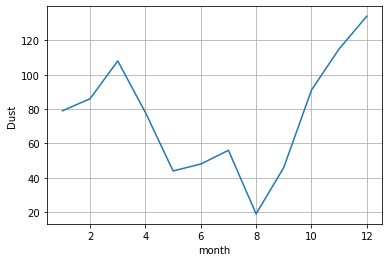

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, 13), tsp_list)
plt.xlabel('month')
plt.ylabel('Dust')
plt.grid()

### 加上中文會有問題

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25080 missing from current font.
  font.set_text

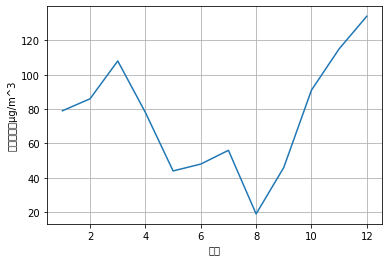

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1, 13), tsp_list)
plt.xlabel('月份')
plt.ylabel('總懸浮微粒μg/m^3')
plt.grid()

### 處理中文字的方法

- google提供的免費字型: https://fonts.google.com/


In [12]:
from google.colab import files

uploaded = files.upload()

Saving NotoSansTC-Black.otf to NotoSansTC-Black.otf


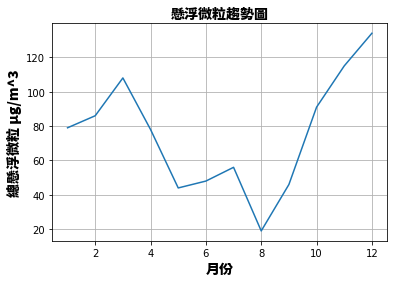

In [13]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"NotoSansTC-Black.otf", size=14)

months = list(range(1, 13))
plt.plot(months, tsp_list)
plt.title('懸浮微粒趨勢圖', fontproperties = font)
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒 μg/m^3', fontproperties = font)
plt.grid()

- 再整理一站出來，並把圖畫在一起

In [14]:
tsp_list2 = []
for item in data_list[1:]:
    name = item[0]
    date = item[1]
    tsp = item[2]
    if name == '西子灣中山大學':
        tsp_list2.append(int(tsp))
tsp_list2

[84, 48, 55, 51, 22, 35, 41, 28, 24, 103, 77, 87]

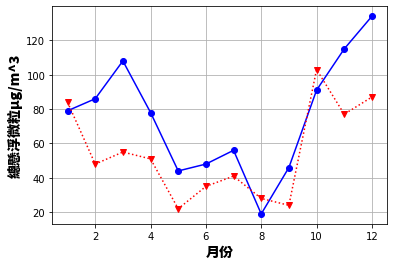

In [16]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"NotoSansTC-Black.otf", size=14)

months = list(range(1, 13))
plt.plot(months, tsp_list, 'b-o')
plt.plot(months, tsp_list2, 'r:v')
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒μg/m^3', fontproperties = font)
plt.grid()

## 加上圖例讓趨勢圖更好看

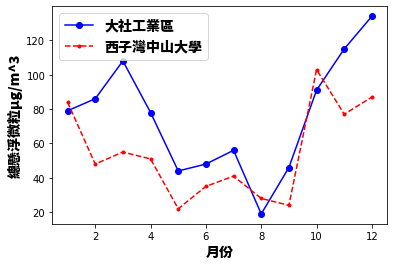

In [17]:
plt.plot(months, tsp_list, 'b-o', label=u'大社工業區')
plt.plot(months, tsp_list2, 'r--.', label=u'西子灣中山大學')
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒μg/m^3', fontproperties = font)
plt.legend(prop=font)
